<a href="https://colab.research.google.com/github/JuniorHZ19/HerramientasIA/blob/main/imagetoimage4.5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing_image_downloader

In [ ]:
from bing_image_downloader import downloader


downloader.download("paisajes,personas", limit=10,  output_dir='dataset',
                    adult_filter_off=True, force_replace=False, timeout=60)

[%] Downloading Images to /content/dataset/paisajes,personas


[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://i.blogs.es/2f746e/incluir_personas_paisajes/1366_2000.jpeg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.ytimg.com/vi/ETwyocPMOn0/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.blogs.es/f8a8ec/incluir_personas_paisajes_historia/1024_2000.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://get.pxhere.com/photo/man-landscape-grass-wilderness-walking-person-mountain-sky-hiking-field-meadow-prairie-hill-adventure-mountain-range-ridge-clouds-mountains-grassland-fell-rural-area-mountainous-landforms-1179623.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://c.pxhere.com/photos/b5/4d/people_girl_women_person_beauty_happy_female_young-813823.jpg!s
[%] File Downloaded !

[%] Downloading Image #6 from https://gusuguito.com/wp-content/uploads/2019/08/paisaje_person

In [ ]:
!wget http://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip
!unzip DIV2K_train_HR.zip # This is our dataset link. I will include this command in the description

In [ ]:
#@markdown # *0) ** Instalando libreria(OBLIGATORIO)

!pip install torch torchvision torchaudio


In [ ]:
#@markdown # *1) ** Clase Para manejo de directorios de datasets de imagenes


import os
import cv2
import pandas as pd
from PIL import Image
import torch
from torchvision import transforms
# Recorre el directorio  y elmiina los archvios que no tiene las extensioens permitidas

class DataSetManage:




 def comprobar_ext_directorios(self,directorio):

  for clase,[directorio,etiquetas] in(directorio.items()):
   lista_directorio=os.listdir(directorio)
   self._validarExt(directorio)



 def  _validarExt(self,directorio):
  print(directorio)
   # Extensiones permitidas
  extensiones_permitidas = {".jpg", ".jpeg", ".png"}
  for root, dirs, files in os.walk(directorio):

    for file in files:
        # Obtiene la extensión del archivo
        _, extension = os.path.splitext(file)

        # Verifica si la extensión no está en la lista de extensiones permitidas y elimina el archivo
        if extension.lower() not in extensiones_permitidas:
            archivo_a_eliminar = os.path.join(root, file)
            os.remove(archivo_a_eliminar)
            print(f"Se eliminó: {archivo_a_eliminar}")


# Cambia nombre de cada archivo dentro del directorio a un valor secuencial

 def cambiar_nombres_directorios(self,directorio):
   for clase,[directorio,etiquetas] in(directorio.items()):
     lista_directorio=os.listdir(directorio)
     self._cambiarNombre(directorio,clase)
     print(directorio)


 def _cambiarNombre(self,directorios,subfijo):
  archivos_en_directorio = os.listdir(directorios)
  for i, archivo in enumerate(archivos_en_directorio, start=1):
    # Construir el nuevo nombre del archivo
    nuevo_nombre = f"{subfijo}{i}{os.path.splitext(archivo)[1]}"

    # Ruta completa del archivo antiguo y nuevo
    ruta_antigua = os.path.join(directorios, archivo)
    ruta_nueva = os.path.join(directorios, nuevo_nombre)

    # Cambiar el nombre del archivo
    os.rename(ruta_antigua, ruta_nueva)
    print(f"Se cambió el nombre de {ruta_antigua} a {ruta_nueva}")


#Obtiene la cantidad de elemntos que tiene la carpeta

 def len_directorio(self,directorio):
    cantidad_elementos = sum(1 for elemento in os.listdir(directorio) if os.path.isfile(os.path.join(directorio, elemento)))
    return cantidad_elementos


#----------------------------------------------------------------------------------------------

#Valida si la imagen se puede leer usando  pill o cv2 si no se puede leer se elimina

 def validar_Img_Pill(self,directorio,):
  for etiqueta,[directorio,clase] in(directorio.items()):

    lista_paths=os.listdir(directorio)
    self._validarLecturaImgPill(directorio,lista_paths)
  print(f"Se ah validado todas las imagenes")

 def validar_Img_cv2(self,directorio):
  for etiqueta,[directorio,clase] in(directorio.items()):

    lista_paths=os.listdir(directorio)
    self._validarLecturaImg(directorio,lista_paths)
  print(f"Se ah validado todas las imagenes")

 def _validarLecturaImg(self,directorio,lista):

  for ruta in(lista):
   imagen=cv2.imread(directorio+ruta)
   if  imagen is None:
     os.remove(directorio+ruta)
     print(f"No se pudo leer y se elimino archivo:{directorio+ruta}")

 def _validarLecturaImgPill(self,directorio,lista):
    for ruta in(lista):
     try:
      imagen=Image.open(directorio+ruta)
     except Exception as e:
      os.remove(directorio+ruta)
      print(f"Archivo '{directorio+ruta}' eliminado.")



#vamos a recorrer el dicionario y validar ruta por ruta si se puede leer sino se elminara
#vamos guaradno al mismo tiempo 3 listas, los directorios , listas de paths de los directiros y de las clases ,para usarlo luego usarlo al crear el csv

 def separar_datos_directorios(self,directorios):
  listas_directorios=[]
  listas_listas_directorios=[]
  listas_clases=[]

  for etiqueta,[directorio,clase] in(directorios.items()):

       lista_paths=os.listdir(directorio)
       listas_directorios.append(directorio)
       listas_listas_directorios.append(lista_paths)
       listas_clases.append(clase)

  return listas_directorios,listas_listas_directorios,listas_clases

 def emparejar_listas_paths(self,lista_listas):

   #Tomamos el minimo tamaño dentro de las lista de cada clase
   tamaño_minimo = min(len(arr) for arr in lista_listas)

   #Vamos a emparejar todas las listas con un tamaño igual que sea la del minimo tamaño de todas,esto para tener un set de datos parejo por cada clase
   Reducido_lista_paths=[]

   #Reduce cada lista de los paths a la cantidad minimo para que todos tenga iaugal cantidad
   for listas in(lista_listas):
    Reducido_lista_paths.append(listas[:tamaño_minimo])

   return Reducido_lista_paths
#---------------------------------------------------------------------------------


 def crear_paths_csv(self,directorio_base,lista_paths,clases,nombre_archivo):

   columnas=["path","etiqueta"]
   datos_csv=[]

   for dir_base,dir_path,clase in  zip(directorio_base,lista_paths,clases):

    for path  in (dir_path):

     datos_csv.append([dir_base+path ,clase])


   df_lista=pd.DataFrame(datos_csv,columns=columnas)
   df_lista=df_lista.sort_values(by='path')
   df_lista.to_csv(nombre_archivo,index=False)
   print("Csv Creado")
#---------------------------------------------------------------------------------

#devuelve cuatnos elemtnos tiene cada clase
 def total_elementos(self,directorio,csv_path):
    df=pd.read_csv(csv_path)
    for clase,[directorio,etiqueta] in (directorio.items()):
     tamaño_etiqueta=(df["etiqueta"] == etiqueta).sum()
     print(f"la clase {clase} tiene :{tamaño_etiqueta} elementos")


#-------------------------------------------------------------------------------------------------

  #Funciones para data aumentation
 def   data_aumentation_conjunto(self,input_imagen_folder,output_path_folder,iteraciones,transformaciones,keepname=False):  #ingresa trnasformacioens como compose donde se aplicara las trasnfomracioens conjutnos pero se repteira un numero de veces por cada imagen

   for filename in os.listdir(input_imagen_folder):

    if filename.endswith('.jpg') or filename.endswith('.png'):

        input_path = os.path.join(input_imagen_folder, filename)
        if(keepname==False):
         output_path = os.path.join(output_path_folder, f'transformed_{filename}')
        else:
          output_path = os.path.join(output_path_folder, f'{filename}')
        # Aplica las transformaciones
        print(output_path)
        self._apply_transfomaciones_conjunto_it(input_path,output_path,int(iteraciones),transformaciones,keepname)


 def   data_aumentation_individual(self,input_imagen_folder,output_path_folder,transformaciones,keepname=False):  #las trnasfomaciones solo pasaremos la lista ya que ira aplicando la transformacion una por una por cada imagen

  for filename in os.listdir(input_imagen_folder):

    if filename.endswith('.jpg') or filename.endswith('.png'):
        input_path = os.path.join(input_imagen_folder, filename)
        if(keepname==False):
         output_path = os.path.join(output_path_folder, f'transformed_{filename}')
         print("opasasmos")
        else:
          output_path = os.path.join(output_path_folder, f'{filename}')
        # Aplica las transformaciones
        self._apply_transfomaciones_conjunto(input_path,output_path,transformaciones,keepname)



 def _apply_transfomaciones_conjunto_it(self,input_imagen_path,output_iamgen_path,iteraciones,transformations=None,keepname=False): #aplica las transfomracioens  conjutas por iteracion y se guarda las iamgenes

   imagen=Image.open(input_imagen_path)


   for i in range(iteraciones):
      imagen_trasformada=transformations(imagen)

      out_root, out_extension = os.path.splitext(output_iamgen_path)
      if(keepname==False):
       imagen_trasformada.save(f"{out_root}_{i}{out_extension}")
      else:
        imagen_trasformada.save(f"{out_root}{out_extension}")

 def _apply_transfomaciones_conjunto(self,input_imagen_path,output_iamgen_path,transformations=None,keepname=False): #aplica las transfomracioens individuales  y se guarda las iamgenes

  imagen=Image.open(input_imagen_path)

  for i,transformacion in enumerate(transformations):
   imagen_transformada=transformacion(imagen)
   out_root, out_extension = os.path.splitext(output_iamgen_path)
   if(keepname==False):
     imagen_transformada.save(f"{out_root}_{i}{out_extension}")
   else:
      imagen_transformada.save(f"{out_root}{out_extension}")



In [ ]:


#Creamos las carpetas con las imagenes en hr y lw

#Creamos los arhcivo baja resolucion aparitr de imangenes alta resoulcion en hr , estos archios iran a carpaeta lw
directorio_in="/content/dataset/paisajes,personas/"
directorio_out="/content/imagenes/"

#antes de otrogar mediads de hr y lw , chekea como el generador va votando las resolucioens hr_fake segun la resolucion lw que especifics tiene qeu conicidr
#ya que el discriminador necsita la misma medidades tanto para el hr y el hr_fake que genera el generador

transformaciones=transforms.Compose([
transforms.Resize((256, 256),interpolation=transforms.InterpolationMode.BICUBIC),

])




datasetmanage=DataSetManage()
datasetmanage.data_aumentation_conjunto(directorio_in,directorio_out,1,transformaciones)


/content/imagenes/transformed_Image_6.jpg
/content/imagenes/transformed_Image_8.jpg
/content/imagenes/transformed_Image_4.jpg
/content/imagenes/transformed_Image_9.jpg
/content/imagenes/transformed_Image_2.jpg
/content/imagenes/transformed_Image_5.jpg
/content/imagenes/transformed_Image_10.jpg
/content/imagenes/transformed_Image_3.jpg


In [ ]:

dmg=DataSetManage()
directoriolw={
     "img":["/content/imagenes/",1],
}



listas_directorios,listas_paths_directorios,listas_clases=dmg.separar_datos_directorios(directoriolw)
Dataset_csv="dataset.csv" #nombre que tenda nuestlo csv
dmg.crear_paths_csv(listas_directorios,listas_paths_directorios,listas_clases,Dataset_csv)



Csv Creado


In [ ]:
#DEFNIIR DISPOSITIVO:
if torch.cuda.is_available():
    torch.cuda.empty_cache()
    print("CUDA está disponible.")
    device = torch.device("cuda")
else:
    print("CUDA no está disponible. Se utilizará la CPU.")
    device = torch.device("cpu")

CUDA no está disponible. Se utilizará la CPU.


In [ ]:
#@markdown # *2) ** Creacion de clase DATASET(OBLIGATORIO)
import torch
from torch.utils.data import Dataset,DataLoader
import pandas as pd
import numpy as np
import cv2
from PIL import Image
from skimage.color import rgb2lab, lab2rgb

class MiDataSet(Dataset):
    def __init__(self, csv, transform=None):
        self.data = pd.read_csv(csv)
        self.path = self.data["path"]
        self.samples = self.data["path"].shape[0]
        self.transform = transform

    def __getitem__(self, idx):
        ruta = self.path[idx]

        # Abrir la imagen
        img = Image.open(ruta).convert("RGB")

        l_channel,ab_channel =self.rgb_a_lab(img)

        #normalizar:
        ab_channel_normalizado=(((ab_channel+ 128) / 255) * 2) - 1  #normalizado ab que va de -128 a 127  a un rango -1 a 1 para que conicida con la salida de generador
        l_channel_normalizado=l_channel/100 #normalizado l que va de 0-100 a un  rango 0-1

        if self.transform:
            l_tensor= self.transform(l_channel_normalizado)
            ab_tensor = self.transform(ab_channel_normalizado)

        return l_tensor, ab_tensor

    def __len__(self):
        return self.samples

    def rgb_a_lab(self,img):

      lab_image=rgb2lab(img)

      # Separa los canales L y AB
      l_channel = lab_image[:,:, 0]
      ab_channel=lab_image[:,:, 1:]


      return l_channel,ab_channel

    def lab_a_rgb(self,l,ab):
      rgb_image=np.zeros((256,256,3))
      rgb_image[:,:,0]=l
      rgb_image[:,:,1:]=ab
      return lab2rgb(rgb_image)





In [ ]:

 from PIL import Image
 img = Image.open("/content/imagenes/transformed_Image_3_0.jpg")
 array_img=np.array(img)

 lab_image=rgb2lab(img)
 l=lab_image[:,:,0]
 ab=lab_image[:,:,1:]


 print(np.max(ab))


83.7986302385693


/usr/local/lib/python3.10/dist-packages/skimage/_shared/utils.py:394: UserWarning: Color data out of range: Z < 0 in 35880 pixels
  return func(*args, **kwargs)


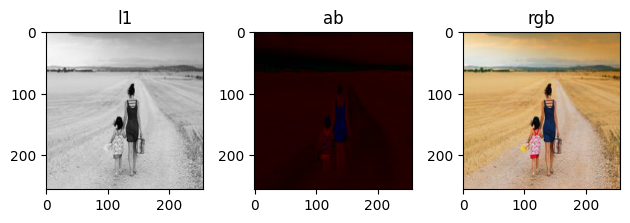

In [ ]:
#CREANDO DATASETS Y DATALOADERS:
from skimage.color import lab2rgb
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms

transformaciones = transforms.Compose([
    transforms.ToTensor(),

])

batch_size=3




dataset =MiDataSet("/content/dataset.csv",transformaciones)
data_loader=DataLoader(dataset,batch_size=batch_size)

l1,ab=dataset.__getitem__(2)

ab_desnormalizado=((((ab+1)/2)*255))-128

l1_desnormalizado=l1*100


#Visualisando

l1 = l1_desnormalizado.squeeze().numpy()
ab = ab_desnormalizado.squeeze().permute(1, 2, 0).numpy()

# Visualizar la imagen generada
# Subfigura l1
plt.subplot(1, 3, 1)
plt.imshow(l1,cmap='gray')
plt.title('l1')

# Subfigura ab
plt.subplot(1, 3, 2)

img_ab = np.zeros((256, 256, 3))  # crea un array de ceros para la imagen RGB
img_ab[:,:,1:] = ab
plt.imshow(img_ab)
plt.title('ab')


# Subfigura rgb
plt.subplot(1, 3, 3)

img_rgb = np.zeros((256, 256, 3))  # crea un array de ceros para la imagen RGB
img_rgb[:,:,0]=l1
img_rgb[:,:,1:] = ab

plt.imshow(lab2rgb(img_rgb))
plt.title('rgb')

# Ajustar diseño
plt.tight_layout()

# Mostrar las imágenes
plt.show()

In [ ]:
#@markdown # *0) ** Creando clase Discriminadora:

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import Dataset,DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F

class cnnBlock(nn.Module):
  def __init__(self,in_channels,out_channels,stride=2):
   super(cnnBlock,self).__init__()
   self.conv=nn.Sequential(
         nn.Conv2d(in_channels,out_channels,4,stride,padding=1),
         nn.BatchNorm2d(out_channels),
         nn.LeakyReLU(0.2),
     )
  def forward(self,x):
    return self.conv(x)

class Discriminator (nn.Module):
  def __init__(self):
   super(Discriminator,self).__init__()

   self.inicial=nn.Sequential(
                           nn.Conv2d(3,64,4,2,1),
                           nn.LeakyReLU(0.2),
                        )

   self.cnnblock1=cnnBlock(64,128)
   self.cnnblock2=cnnBlock(128,256)
   self.cnnblock3=cnnBlock(256,512,stride=1)

   self.lastconv= nn.Conv2d(512,1,4,1,1)


  def forward(self,x,y):

    x=torch.cat([x,y],dim=1)

    x=self.inicial(x)
    x=self.cnnblock1(x)
    x=self.cnnblock2(x)
    x=self.cnnblock3(x)

    x=self.lastconv(x)
    out=torch.sigmoid(x)

    return out







In [ ]:
d=Discriminator()
x = torch.randn(2, 1, 256, 256)  # Ejemplo de tensor x con 3 canales
y = torch.randn(2, 2, 256, 256)  # Ejemplo de tensor y con 5 canales

# Concatenar los tensores x e y a lo largo de la dimensión de los canales
ju=d(x,y)
print(ju.shape)

torch.Size([2, 1, 30, 30])


In [ ]:
discriminador=Discriminator()
discriminador=discriminador.to(device)
x=torch.randn(20,3,256,256).to(device)
y=torch.randn(20,3,256,256).to(device)
print(discriminador(x,y).shape)

torch.Size([20, 1, 30, 30])


In [ ]:
#---------------------GENERADOR BASADO EN U- NET---------------------------------------------------

import torch.nn.functional as F

#input debe ser 256x256 otras dimeneoins  puede que tenega eror al mometno de concat las dimenes reducidas debe de conicidir y este unetblacok se ajsuta a una etnrada 256x256
class U_Net_block(nn.Module):

  def __init__(self,in_channel,out_channel,type,activacion="leakyrelu",dropout_on="False"):
   super(U_Net_block,self).__init__()

   if type=="down" :

    self.block=nn.Conv2d(in_channel,out_channel,kernel_size=4,stride=2,padding=1,bias=False)

   elif type=="up":

    self.block=nn.ConvTranspose2d(in_channel,out_channel,kernel_size=4,stride=2,padding=1,bias=False)

   self.batchnorm=nn.BatchNorm2d(out_channel)

   self.activacion=activacion
   self.leakyrelu=nn.LeakyReLU(0.2)
   self.relu=nn.ReLU()

   self.dropout_on=dropout_on # solo si necsitmos usar el dropout

   self.dropout=nn.Dropout(0.5)

  def forward(self,x):

     x=self.block(x)
     x=self.batchnorm(x)

     if(self.activacion=="leakyrelu"):
      out=self.leakyrelu(x)
     else:
      out=self.relu(x)

     if(self.dropout_on==True):
      out=self.dropout(x)

     return out


class Generator_U_Net(nn.Module):

    def __init__(self,in_channel=3):
        super(Generator_U_Net,self).__init__()

        # Encoder Seccion:

        self.inicial=nn.Sequential(
            nn.Conv2d(in_channel,64,kernel_size=4,stride=2,padding=1,bias=False), # primer bloque convolucional down no tiene batchnorm
            nn.LeakyReLU(0.2)
        )


        self.encoder1=U_Net_block(64,128,"down",activacion="leakyrelu")
        self.encoder2=U_Net_block(128,256,"down",activacion="leakyrelu")
        self.encoder3=U_Net_block(256,512,"down",activacion="leakyrelu")
        self.encoder4=U_Net_block(512,512,"down",activacion="leakyrelu")
        self.encoder5=U_Net_block(512,512,"down",activacion="leakyrelu")
        self.encoder6=U_Net_block(512,512,"down",activacion="leakyrelu")

        self.bottleneck=nn.Sequential( nn.Conv2d(512,512,4,2,1,bias=False),
                                       nn.ReLU())

        # Decoder Seccion:


        self.decoder1=U_Net_block(512,512,"up",activacion="relu",dropout_on=True)
        self.decoder2=U_Net_block(1024,512,"up",activacion="relu",dropout_on=True)
        self.decoder3=U_Net_block(1024,512,"up",activacion="relu",dropout_on=True)
        self.decoder4=U_Net_block(1024,512,"up",activacion="relu")
        self.decoder5=U_Net_block(1024,256,"up",activacion="relu")
        self.decoder6=U_Net_block(512,128,"up",activacion="relu")
        self.decoder7=U_Net_block(256,64,"up",activacion="relu")


        # Last

        self.lastup=nn.Sequential(
            nn.ConvTranspose2d(128,2,kernel_size=4,stride=2,padding=1,bias=False),
            nn.Tanh(),
        )

    def forward(self,x):

        d1=self.inicial(x) # d1 ->64 out
        d2=self.encoder1(d1) # d2 ->128 out
        d3=self.encoder2(d2) # d3 ->256 out
        d4=self.encoder3(d3) # d4 ->512 out
        d5=self.encoder4(d4) # d5 ->512 out
        d6=self.encoder5(d5) # d6 ->512 out
        d7=self.encoder6(d6) # d7 ->512 out

        bneck=self.bottleneck(d7)  #bneck -> 512 out

        e1=self.decoder1(bneck) #e1 -> 512 out
        e2=self.decoder2(torch.cat([e1,d7],1)) # e2  in ->512+512=1024  out->512
        e3=self.decoder3(torch.cat([e2,d6],1)) # e3  in ->512+512=1024   out->512
        e4=self.decoder4(torch.cat([e3,d5],1)) # e4 in ->512+512=1024   out->512
        e5=self.decoder5(torch.cat([e4,d4],1)) # e5 in ->512+512=1024    out->256

        e6=self.decoder6(torch.cat([e5,d3],1)) # e6 in ->256+256=512   out->128
        e7=self.decoder7(torch.cat([e6,d2],1)) # e7 in ->128+128=256  out->64


        out=self.lastup(torch.cat([e7,d1],1)) # last in 64+64  out->3

        return out

In [ ]:
#VAMOS A VER QUE MEDIADES EL GENERADOR DA COMO RESUTLADO CON LW RESOLUTIONS MEDIDAES:

generador=Generator_U_Net()
generador=generador.to(device)
x=torch.randn(20,3,256,512).to(device)

print(generador(x).shape)

torch.Size([20, 2, 256, 512])


In [ ]:
#PROBAMOS EL GENERADOR INCIAL:

from PIL import Image
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


#--------------------------------------------------------------------------------------------------------
def show_comparacion(real,generado): #deben de ingrenar don tennoren de imagen generada y real
 print(generado.shape)
 print(real.shape)
 real=real.detach().squeeze().cpu().numpy().transpose(1, 2, 0)
 generado=generado.squeeze().cpu().detach().numpy().transpose(1, 2, 0)
# Primer subgráfico: imagen original
 plt.subplot(1, 2, 1)
 plt.imshow(generado)  # Convertir a NumPy y transponer dimensiones
 plt.title('Imagen Generada')
 plt.axis('off')

# Segundo subgráfico: imagen transformada
 plt.subplot(1, 2, 2)
 plt.imshow(real)  # Convertir a NumPy y transponer dimensiones
 plt.title('Imagen Real')
 plt.axis('off')

# Ajustar el diseño para evitar superposición de títulos
 plt.tight_layout()

# Mostrar la figura
 plt.show()


 plt.figure(figsize=(10, 5))
#-----------------------------------------------------------------------------------
generador=Generator_U_Net().to("cpu")


ruta_imagen = "/content/imagenes/transformed_0002_0.png"
imagen = Image.open(ruta_imagen)

transformaciones = transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),
])

#original iamgen tensor
tensor_imagen = transformaciones(imagen).unsqueeze(0)
tensor_imagen=tensor_imagen.to("cpu")

#imagen generada
imagen_generada=generador(tensor_imagen)
print(imagen_generada.shape)
imagen_numpy = imagen_generada.squeeze().detach().numpy()

# Mostrar la imagen utilizando matplotlib
plt.imshow(imagen_numpy.transpose(1, 2, 0))  # cmap='gray' es para mostrar la imagen en escala de grises
plt.axis('off')  # Ocultar ejes
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/imagenes/transformed_0002_0.png'

In [ ]:
from torchvision import models

#vamos a extraer los feature es decir las caracteisicas imporantes que exiten entre ambas imagnes y compraralas esto se usara par luego hace rel loss contet apartir del contendio

class Feature_Extractor(nn.Module):
    def __init__(self):
        super(Feature_Extractor, self).__init__()
        # Cargar un modelo VGG-19 preentrenado
        vgg19_model = models.vgg16(pretrained=True).features.eval()

        # No actualizar los pesos del modelo VGG durante el entrenamiento
        for param in vgg19_model.parameters():
            param.requires_grad = False

        selected_layers = list(vgg19_model.children())[:31] #AGREGAMOS EL VGG HASTA VERFICAR QUE EL ULITMA CAPA NO TENGA RELU

        self.vgg=nn.Sequential(*selected_layers)

    def forward(self, img):

        # Extraer características de las imágenes generada y real
        feature_img = self.vgg(img)

        return feature_img


# TV Loss se utiliza comúnmente en tareas de generación de imágenes para reducir el ruido y fomentar la suavidad en las imágenes generadas.

class TVLoss(nn.Module):
  def __init__(self, tv_loss_weight=1):
    super(TVLoss, self).__init__()
    self.tv_loss_weight=tv_loss_weight
  def forward(self, x):
    batch_size=x.size()[0]
    h_x = x.size()[2]
    w_x = x.size()[3]

    count_h = self.tensor_size(x[:, :, 1:, :])
    count_w = self.tensor_size(x[:, :, :, 1:])


    h_tv = torch.pow(x[:, :, 1:, :] - x[:, :, :h_x - 1, :], 2).sum()
    w_tv = torch.pow(x[:, :, :, 1:] - x[:, :, :, :w_x - 1], 2).sum()
    return self.tv_loss_weight * 2 * (h_tv / count_h + w_tv / count_w) / batch_size

  # Forgot to implement an important method
  @staticmethod # Must add this
  def tensor_size(t):
    return t.size()[1] * t.size()[2] * t.size()[3]


def psnr(image1, image2):
    mse = torch.mean((image1 - image2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 1
    psnr_value = 10 * torch.log10((max_pixel ** 2) / mse)
    return psnr_value




In [ ]:
vgg=Feature_Extractor()
print(vgg)
tv_loss= TVLoss()
x=torch.randn(18,3,60,60)
tv_loss=tv_loss(x)

print(tv_loss)

In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torchvision.utils as vutils
import sklearn
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from tqdm import tqdm
# ...

#d=Discriminator(image_dim).to(device)
#g=Generador(dim_vector_ruido,image_dim).to(device)

#d.load_state_dict(torch.load("/content/modelo_gatos_d.pt"))
#g.load_state_dict(torch.load("/content/modelo_gatos_g.pt"))

#d=d.to(device)
#g=g.to(device)


# Supongamos que ya has definido las instancias de los modelos Generador (g) y Discriminador (d),
# y has configurado los optimizadores (g_optimizer y d_optimizer) y la función de pérdida (criterio).



def GAN(discriminador, generador, data_loader, num_epochs, batch_size, criterio_g,criterio_d, d_optimizador, g_optimizador, device):

    discriminador=discriminador.to(device)
    generador=generador.to(device)
    feature_extractor=Feature_Extractor().to(device)
    tv_loss= TVLoss().to(device)
    L1=nn.L1Loss()

    for epoch in range(num_epochs):

        resultados = { 'd_loss':[],"g_loss":[], "d_score":[], "psnr":[]}
        data_loader = tqdm(data_loader)

        for  (l, ab) in (data_loader):

            l=l.float().to(device)
            ab=ab.float().to(device)

            generador.eval()
            discriminador.train()

            # Entrenar el discriminador con imágenes reales
            d_optimizador.zero_grad()

            prediction_real = discriminador(l.float(),ab)

            real_loss = criterio_d(prediction_real, torch.ones_like(prediction_real).to(device))


            # Entrenar el discriminador con imágenes generadas

            fake_ab = generador(l)

            prediction_fake = discriminador(l,fake_ab.float().detach())

            fake_loss = criterio_d(prediction_fake, torch.zeros_like(prediction_fake).to(device)).to(device)
            discriminator_loss = (real_loss + fake_loss)/2

            discriminator_loss.backward()

            d_optimizador.step()

            # Entrenar el generador
            generador.train()
            discriminador.eval()
            g_optimizador.zero_grad()

            generated_ab = generador(l.detach())

            d_fake=discriminador(l,generated_ab)

            loss_gan=criterio_g(d_fake,torch.ones_like(d_fake).to(device)) #loss del generador aparitr del disicmirnador que dice si es o no una imagen falsa
            loss_g=L1(ab,generated_ab)

            generator_loss = (100*loss_g)+loss_gan
            generator_loss.backward()
            g_optimizador.step()


            #resultados por batch:
            resultados["d_loss"].append(discriminator_loss.item())
            resultados["g_loss"].append(generator_loss.item())


            data_loader.set_description(desc="[%d/%d] Loss_D: %.4f Loss_G: %.4f psnr: %.4f" % (
            epoch, num_epochs, np.mean(resultados['d_loss']),
            np.mean(resultados['g_loss']) ,
            np.mean( resultados['psnr']) ,

              ))

        # Imprimir estadísticas y visualizar imágenes generadas al final de cada época
        print(f'Época [{epoch}/{num_epochs}] '
                      f'Pérdida del Discriminador: {np.mean(resultados["d_loss"]):.4f}, '
                      f'Pérdida del Generador: {np.mean(resultados["g_loss"]):.4f}',f'psnr:{np.mean(resultados["psnr"]):.4f}')
        with torch.no_grad():

            generador.eval()

            ab_test = generador(l).detach()

            generado_ab=ab_test[0].squeeze().cpu().detach().numpy().transpose(1, 2, 0)
            l_test = l[0].squeeze().cpu().numpy()
            ab_test=ab[0].squeeze().cpu().numpy().transpose(1, 2, 0)

            ab_test_desnormalizado=((((ab_test+1)/2)*255))-128
            ab_desnormalizado=((((generado_ab+1)/2)*255))-128
            l1_desnormalizado=l_test*100

            plt.figure(figsize=(20, 5))
            # Subfigura generada ab
            plt.subplot(1, 4, 1)
            img_rgb = np.zeros((256, 256, 3))  # crea un array de ceros para la imagen RGB

            img_rgb[:,:,1:] =ab_desnormalizado
            plt.imshow(img_rgb)
            plt.title('imagen generada')

            # Subfigura generada rgb
            plt.subplot(1, 4, 2)
            img_rgb = np.zeros((256, 256, 3))  # crea un array de ceros para la imagen RGB
            img_rgb[:,:,0]=l1_desnormalizado
            img_rgb[:,:,1:] =ab_desnormalizado
            plt.imshow(lab2rgb(img_rgb))
            plt.title('imagen generada')


            # Subfigura real ab
            plt.subplot(1, 4, 3)
            img_rgb2 = np.zeros((256, 256, 3))  # crea un array de ceros para la imagen RGB
            #img_rgb2[:,:,0]=l1_desnormalizado
            img_rgb2[:,:,1:] = ab_test_desnormalizado
            plt.imshow(img_rgb2)
            plt.title('imagen real')

            # Subfigura real rgb
            plt.subplot(1, 4, 4)
            img_rgb2 = np.zeros((256, 256, 3))  # crea un array de ceros para la imagen RGB
            img_rgb2[:,:,0]=l1_desnormalizado
            img_rgb2[:,:,1:] = ab_test_desnormalizado
            plt.imshow(lab2rgb(img_rgb2))
            plt.title('imagen real')

           # Ajustar diseño
            plt.tight_layout()

          # Mostrar las imágenes
            plt.show()



#--------------------------------------------------------------------------------------------



num_epochs=50





d=Discriminator()
g=Generator_U_Net(1)

d.load_state_dict(torch.load("/content/colorgan_d.pt"))
g.load_state_dict(torch.load("/content/colorgan_g.pt"))

lr_g = 0.00008
lr_d = 0.00008
d_optimizer=optim.Adam(d.parameters(),lr=lr_d, betas=(0.5, 0.999))
g_optimizer=optim.Adam(g.parameters(),lr=lr_g, betas=(0.5, 0.999))

criterio_d=nn.BCELoss()
criterio_g=nn.BCELoss()


print(f"learning rate discrimiador:{lr_d}")
print(f"learning rate generador:{lr_g}")

GAN(d,g,data_loader,num_epochs,batch_size,criterio_g,criterio_d,d_optimizer,g_optimizer,device)




In [ ]:
torch.save(g.state_dict(), 'colorgan_g.pt')
torch.save(d.state_dict(), 'colorgan_d.pt')

In [ ]:
data = []
while(1):
  data.append('1234')

In [ ]:

torch.cuda.empty_cache()

In [ ]:
d.load_state_dict(torch.load("/content/srgan_d.pt"))

<All keys matched successfully>

In [ ]:
from PIL import Image
import skimage.io
# Suponiendo que "Generador" es la clase de tu generador y "ruta_modelo" es la ruta del modelo guardado
generador = Generator_U_Net(1)  # creando generado
generador.load_state_dict(torch.load("/content/colorgan_g.pt"))
generador.to(device)
generador.eval()

ruta_imagen = "/content/descarga (24).png"
imagen_pil = Image.open(ruta_imagen).convert("RGB")


lab_image=rgb2lab(imagen_pil)

# Separa los canales L y AB
l_channel = lab_image[:,:, 0]

l_channel=l_channel/100 #normalizar l1

transformaciones = transforms.Compose([
    transforms.ToTensor(),  # Convierte la imagen a un tensor
    transforms.Resize((256,256),interpolation=transforms.InterpolationMode.BICUBIC),
])

l_tensor = transformaciones(l_channel)
l_tensor=l_tensor.to(device)

with torch.no_grad():
    generador.eval()

    generated_ab = generador(l_tensor.detach().float().unsqueeze(0)).squeeze().cpu().numpy().transpose(1, 2, 0)
    ab_desnormalizado=((((generated_ab+1)/2)*255))-128

    img_rgb = np.zeros((256, 256, 3), dtype=np.float64)  # crea un array de ceros para la imagen RGB
    img_rgb[:,:,0]=l_tensor.squeeze().detach().cpu().numpy()*100
    img_rgb[:,:,1:] = ab_desnormalizado

    img_rgb=lab2rgb(img_rgb)


# Visualizar la imagen generada
plt.imshow(img_rgb)
plt.axis('off')
plt.show()


imagen_scaled = (img_rgb / np.max(img_rgb))*255 # como esta en float pil necsit valores rango 0-255

# Convertir la imagen a tipo uint8

imagen_uint8 = imagen_scaled.astype(np.uint8)

# Crear una imagen PIL a partir del arreglo uint8
imagen_pil = Image.fromarray(imagen_uint8)

imagen_bicubic = imagen_pil.resize((imagen_pil.width , imagen_pil.height), resample=Image.BICUBIC)
# Guardar la imagen en disco
imagen_bicubic.save("imagen_pil.png")